Wine Quality Analysis with Decision Trees and Random Forests

Name: Bhavya Sandhu

ID: 23022333

Objective: The objective of this tutorial is to explore and analyze the Wine Quality dataset using machine learning techniques such as Decision Trees and Random Forests . It involves tasks such as data loading, preprocessing, exploratory data analysis (EDA), model training, prediction, evaluation, and visualization.

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix



In [5]:

# Function to plot a learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 6))

    axes.set_title(title, fontweight='bold')
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training Examples", fontweight='semibold')
    axes.set_ylabel("Score", fontweight='semibold')

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")
    return axes

Data Loading and Preprocessing

In [6]:
# Load the Wine Quality dataset
wine = load_wine()
X = wine.data
y = wine.target

# Check for missing values
missing_values = pd.DataFrame(X).isnull().sum().sum()
if missing_values == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset. Imputation may be required.")

# Check for class imbalance
class_distribution = pd.Series(y).value_counts()
print("\nClass Distribution:")
print(class_distribution)

#Normalize features and split into training and testing sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                     random_state=42)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

No missing values found in the dataset.

Class Distribution:
1    71
0    59
2    48
Name: count, dtype: int64


Exploratory Data Analysis

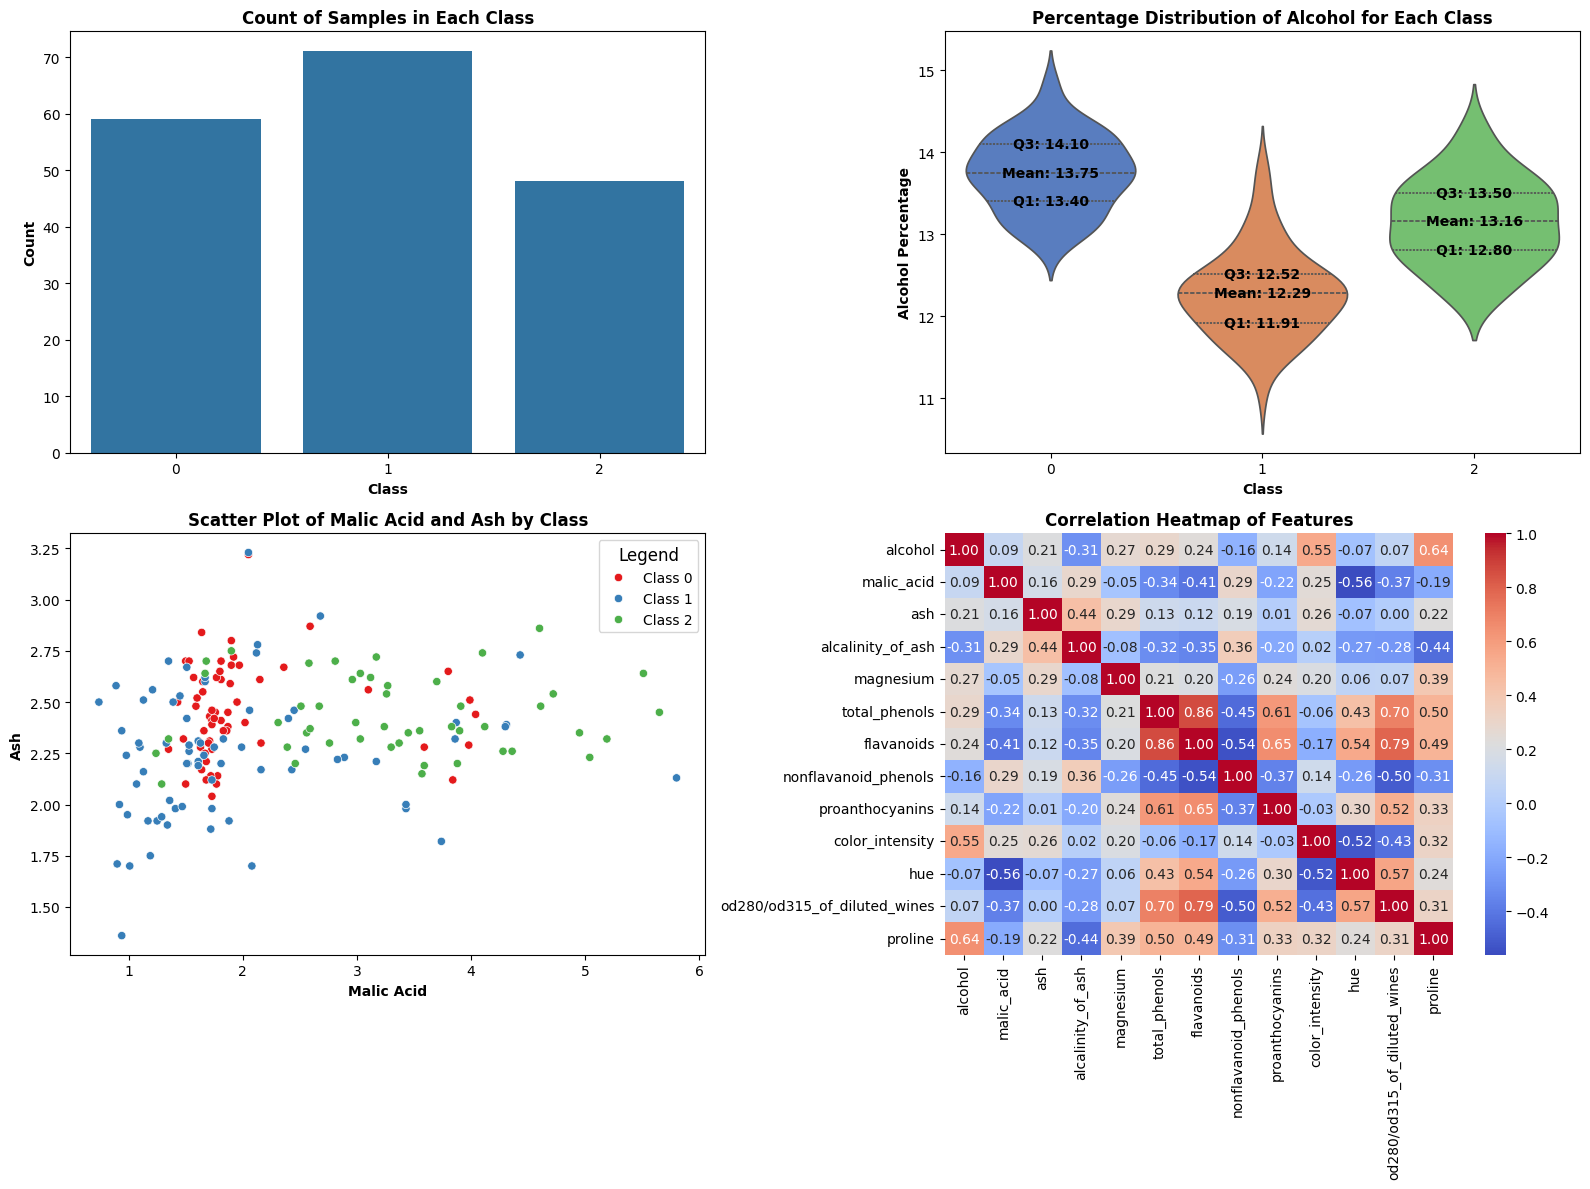

In [7]:
# Fetching class names
class_names = wine.target_names
feature_names = wine.feature_names

# Set up subplots for the best 4 plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Count of samples in each class
sns.countplot(x=y, ax=axes[0, 0])
axes[0, 0].set_title('Count of Samples in Each Class', fontweight='bold')
axes[0, 0].set_xlabel('Class', fontweight='semibold')
axes[0, 0].set_ylabel('Count', fontweight='semibold')

# Plot 2: Percentage Distribution of Alcohol for Each Class
alcohol_by_class = [X[y == i, 0] for i in range(len(class_names))]
sns.violinplot(data=alcohol_by_class, ax=axes[0, 1], inner='quartile', palette="muted")
axes[0, 1].set_title('Percentage Distribution of Alcohol for Each Class', fontweight='bold')
axes[0, 1].set_xlabel('Class', fontweight='semibold')
axes[0, 1].set_ylabel('Alcohol Percentage', fontweight='semibold')

# Add annotations for mean, quartiles, etc.
for i in range(len(class_names)):
    median = np.median(alcohol_by_class[i])
    q1 = np.percentile(alcohol_by_class[i], 25)
    q3 = np.percentile(alcohol_by_class[i], 75)
    axes[0, 1].text(i, median, f'Mean: {median:.2f}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black',
                    fontweight='semibold')
    axes[0, 1].text(i, q1, f'Q1: {q1:.2f}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black',
                    fontweight='semibold')
    axes[0, 1].text(i, q3, f'Q3: {q3:.2f}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black',
                    fontweight='semibold')

# Plot 3: Scatter Plot of Malic Acid and Ash
melic_acid = X[:, 1]
ash = X[:, 2]
scatter = sns.scatterplot(x=melic_acid, y=ash, hue=y, palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Malic Acid and Ash by Class', fontweight='bold')
axes[1, 0].set_xlabel('Malic Acid', fontweight='semibold')
axes[1, 0].set_ylabel('Ash', fontweight='semibold')

# Adjust legend for Scatter Plot
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, [f'Class {i}' for i in range(len(class_names))],
               title='Legend', fontsize='medium', title_fontsize='large')

# Plot 4: Correlation Heatmap
correlation_matrix = pd.DataFrame(X, columns=feature_names).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap of Features', fontweight='bold')

# Adjust layout and save the plots
plt.tight_layout()
plt.savefig('EDA_Plots.png')
plt.show()


Model Definition, Training, Prediction and Evaluation

# 1. Random Forest Model

In [8]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9444444444444444

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      0.95      0.93        21
           2       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54


Random Forest Confusion Matrix:
[[17  2  0]
 [ 0 20  1]
 [ 0  0 14]]


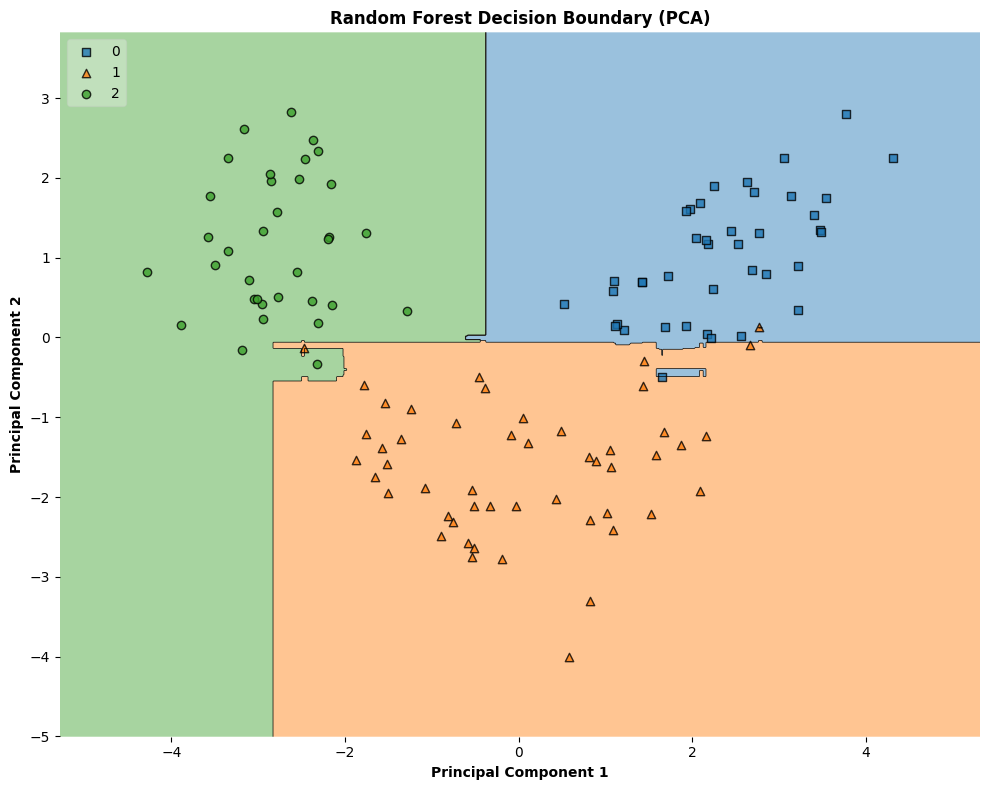

In [9]:
# Plot decision boundaries for Random Forest
fig, ax = plt.subplots(figsize=(10, 8))

# Plot decision regions
plot_decision_regions(X_train_pca, y_train, clf=rf_model, legend=2, ax=ax)

# Customize the plot
ax.set_xlabel('Principal Component 1', fontweight='semibold')
ax.set_ylabel('Principal Component 2', fontweight='semibold')
ax.set_title('Random Forest Decision Boundary (PCA)', fontweight='bold')

# Save and display the plot
plt.tight_layout()
plt.savefig('decision_boundary_plot.png')
plt.show()


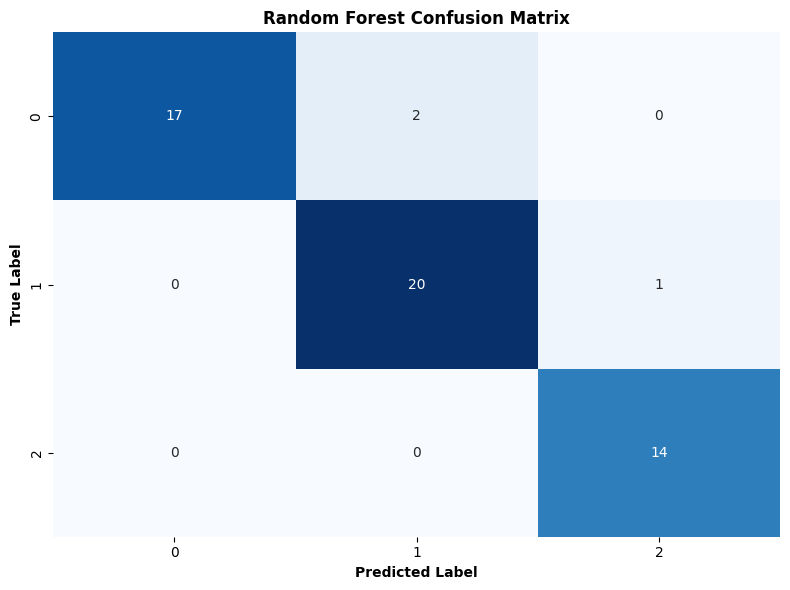

In [10]:
# Plot Random Forest model performance
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Add labels and title
plt.title('Random Forest Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='semibold')
plt.ylabel('True Label', fontweight='semibold')

# Save and display the plot
plt.tight_layout()
plt.savefig('confusion_matrix_plot.png')
plt.show()


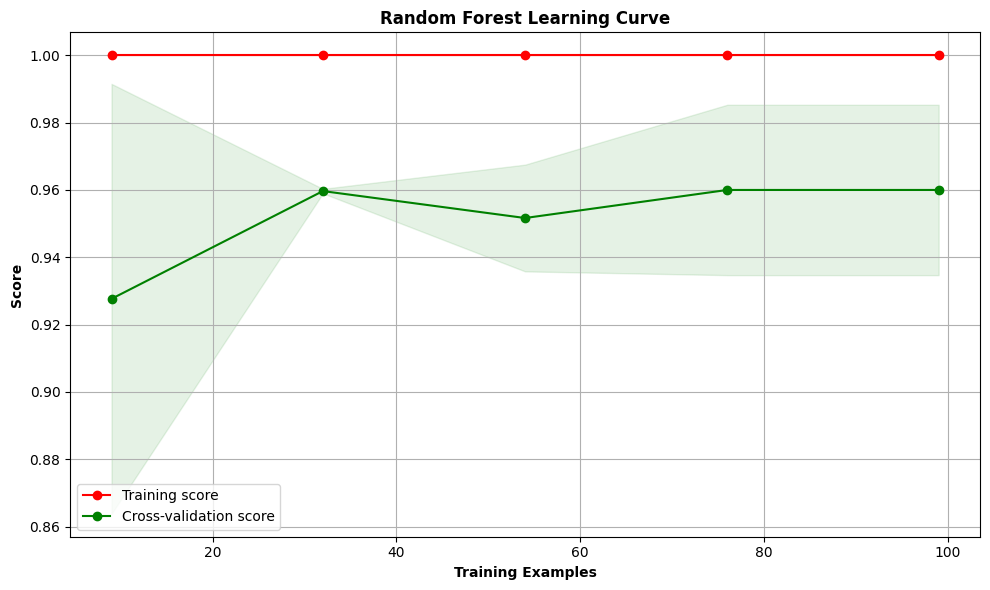

In [11]:
# Plot the learning curve for Random Forest
fig, ax = plt.subplots(figsize=(10, 6))

plot_learning_curve(rf_model, "Random Forest Learning Curve", X_train_pca, y_train, axes=ax, cv=5)

# Save and display the plot
plt.tight_layout()
plt.savefig('learning_curve_plot_rf.png')
plt.show()

2. Decision Tree

Decision Tree Accuracy: 0.9259259259259259


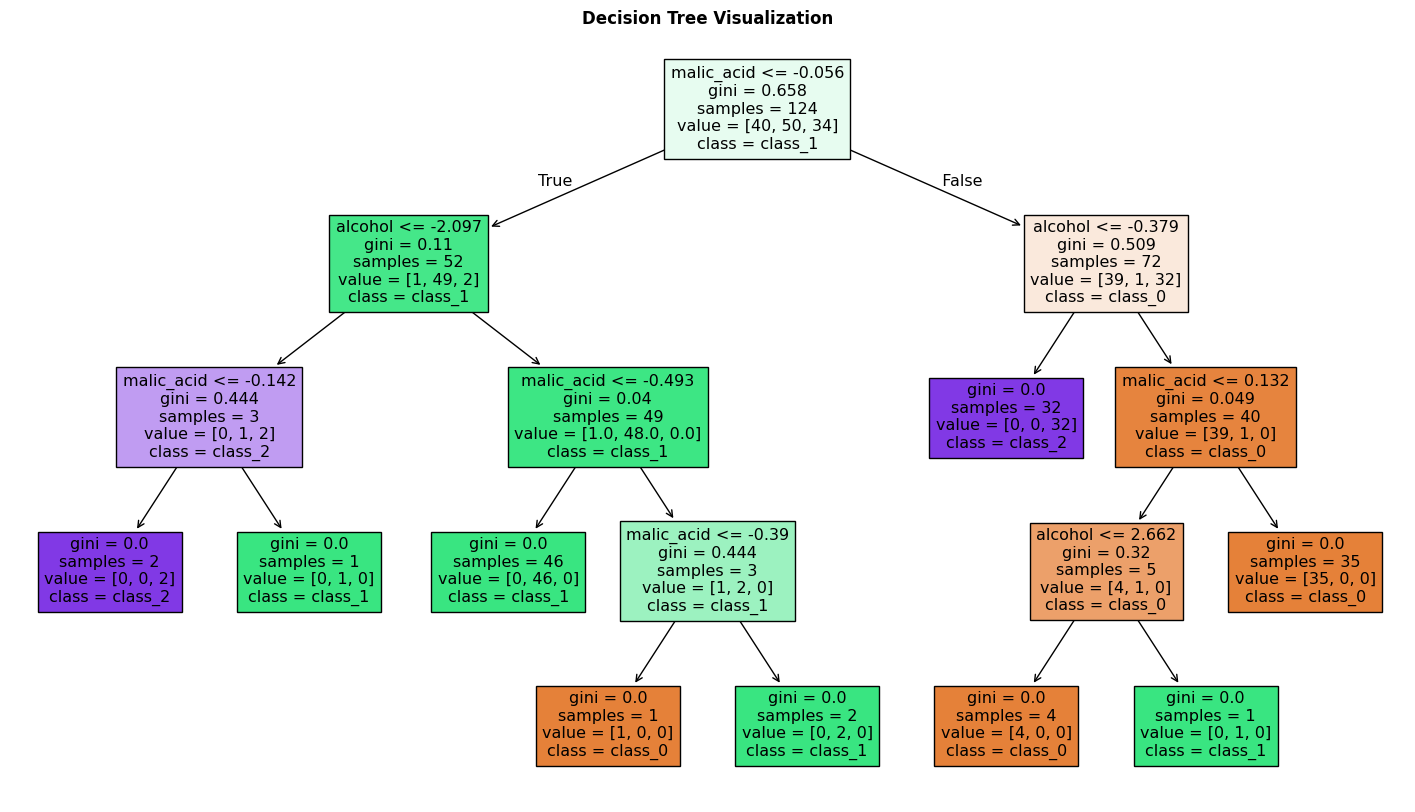

In [12]:
# Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_pca)

# Calculate the accuracy of the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Visualize the decision tree
plt.figure(figsize=(18, 10))
plot_tree(dt_model, filled=True, feature_names=wine.feature_names,
          class_names=wine.target_names)
plt.title("Decision Tree Visualization", fontweight='bold')
plt.savefig('Decision_Tree.png')
plt.show()

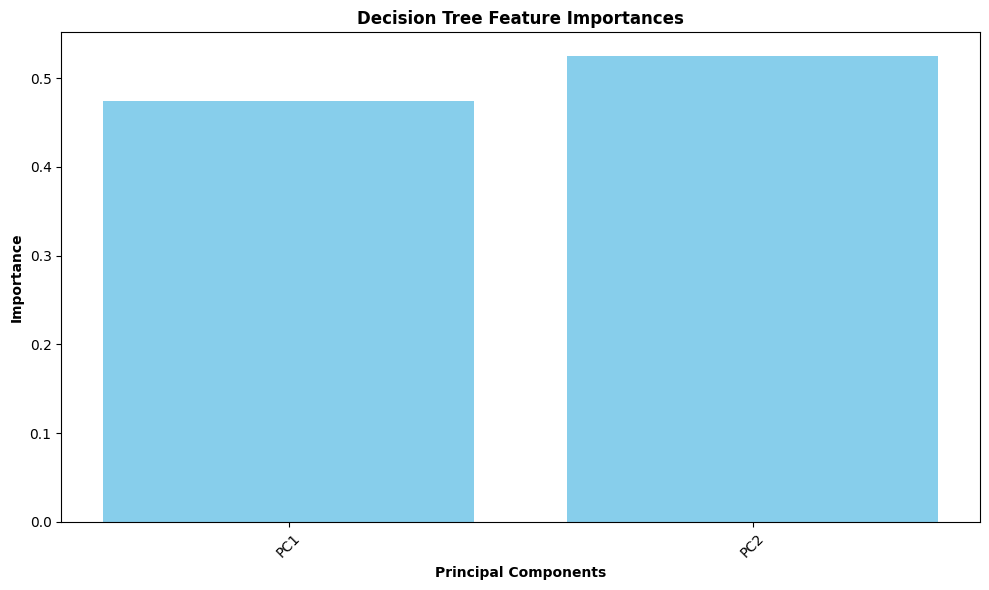

In [13]:
# Plot Decision Tree Feature Importances
importances = dt_model.feature_importances_  # Feature importances from the trained model
feature_labels = [f'PC{i+1}' for i in range(len(importances))]  # Using PCA component names

# Create the feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(feature_labels, importances, color='skyblue')
plt.title('Decision Tree Feature Importances', fontweight='bold')
plt.xlabel('Principal Components', fontweight='semibold')
plt.ylabel('Importance', fontweight='semibold')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and display the plot
plt.savefig('decision_tree_feature_importances.png')
plt.show()